In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime
import statistics
import seaborn as sns
import numpy as np

In [2]:
# Apple
data = pd.read_excel('apple_revenue.xlsx')
dates = data['Date']
revenue = data['Revenue']

# Samsung
data_ss = pd.read_excel('samsung_rev (1).xlsx')
revenue_ss = data_ss['Revenue']
year = data_ss['Date']

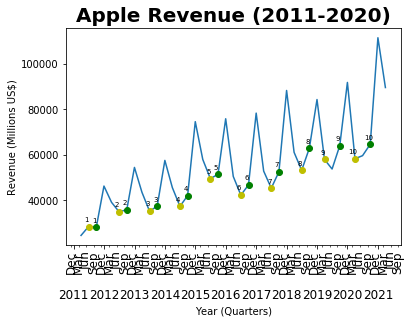

In [3]:
fig, ax = plt.subplots()
release = [38,34,30,26,22,18,14,10,6,2]
minor_release = [39,35,31,27,23,19,15,11,8,4]
count=1
count1=1
ax.set_ylabel('Revenue (Millions US$)', fontsize = 10) 
ax.set_title('Apple Revenue (2011-2020)',fontweight="bold", size=20)
ax.set_xlabel('Year (Quarters)', fontsize = 10)

plt.xticks(fontsize=12)
ax.xaxis.set_tick_params(pad=10)

plot_rev = plt.plot(dates, revenue)

for rel in release:
    plt.plot(dates[rel], revenue[rel], 'go')
    plt.annotate('%d'%count, (dates[rel], revenue[rel]), textcoords="offset points", xytext=(-2,5), ha='center', size=7, 
                 va='baseline')
    count += 1
    
for minor in minor_release:
    plt.plot(dates[minor], revenue[minor], 'yo')
    plt.annotate('%d'%count1, (dates[minor], revenue[minor]), textcoords="offset points", xytext=(-2,5), ha='center', size=7, 
                 va='baseline')
    count1 += 1
    
    
years = mdates.YearLocator()
months = mdates.MonthLocator([3,6,9,12])
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('\n\n%Y')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90, size = 12)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)


In [4]:
#APPLE
quarter1_rev = revenue[0::4].tolist()
quarter4_rev = revenue[1::4].tolist()
quarter3_rev = revenue[2::4].tolist()
quarter2_rev = revenue[3::4].tolist()

#SAMSUNG
quarter1_rev_ss = revenue_ss[0::4].tolist()
quarter2_rev_ss = revenue_ss[1::4].tolist()
quarter3_rev_ss = revenue_ss[2::4].tolist()
quarter4_rev_ss = revenue_ss[3::4].tolist()

In [5]:
# Apple
avg_q1 = int(statistics.mean(list(quarter1_rev)))
avg_q2 = int(statistics.mean(list(quarter2_rev)))
avg_q3 = int(statistics.mean(list(quarter3_rev)))
avg_q4 = int(statistics.mean(list(quarter4_rev)))
avg_rev = [avg_q1, avg_q2, avg_q3, avg_q4]

# Samsung
avg_q1_ss = int(statistics.mean(list(quarter1_rev_ss)))
avg_q2_ss = int(statistics.mean(list(quarter2_rev_ss)))
avg_q3_ss = int(statistics.mean(list(quarter3_rev_ss)))
avg_q4_ss = int(statistics.mean(list(quarter4_rev_ss)))
avg_rev_ss = [avg_q1_ss, avg_q2_ss, avg_q3_ss, avg_q4_ss]

quarters = ['Q1', 'Q2', 'Q3', 'Q4']
print(avg_rev, avg_rev_ss)

[52874, 44047, 48640, 76312] [46343, 47873, 50261, 51520]


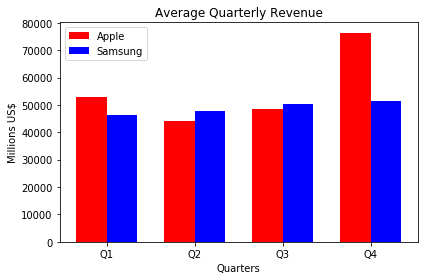

In [6]:
x = np.arange(len(quarters))  # the label locations
width = 0.35  # the width of the bars

fig_b, ax_b = plt.subplots()
rects1 = ax_b.bar(x - width/2, avg_rev, width, label='Apple', color='red')
rects2 = ax_b.bar(x + width/2, avg_rev_ss, width, label='Samsung', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax_b.set_ylabel('Millions US$')
ax_b.set_xlabel('Quarters')
ax_b.set_title('Average Quarterly Revenue')
ax_b.set_xticks(x)
ax_b.set_xticklabels(quarters)
ax_b.legend()
fig_b.tight_layout()
plt.show()

In [7]:
print(quarter1_rev, quarter2_rev, quarter3_rev, quarter4_rev)

[89584, 58313, 58015, 61137, 52896, 50557, 58010, 45646, 43603, 39186, 24667] [59685, 53809, 53265, 45408, 42358, 49605, 37432, 35323, 35023, 28571] [64698, 64040, 62900, 52579, 46852, 51501, 42123, 37472, 35966, 28270] [111439, 91819, 84310, 88293, 78351, 75872, 74599, 57594, 54512, 46333]


In [8]:
#apple q1 change
quarter1_rev_temp = quarter1_rev[:-1]
q1_change = []
zip_object = zip(quarter4_rev, quarter1_rev_temp)
for q4_i, q1_i in zip_object:
    q1_change.append(q1_i-q4_i)

q1_change

[-21855, -33506, -26295, -27156, -25455, -25315, -16589, -11948, -10909, -7147]

In [9]:
#samsung q1 change
quarter1_rev_temp_ss = quarter1_rev_ss[1:]
q1_change_ss = []
zip_object = zip(quarter4_rev_ss, quarter1_rev_temp_ss)
for q4_i, q1_i in zip_object:
    q1_change_ss.append(q1_i-q4_i)

q1_change_ss

[-1810, -2969, -5217, -5216, -3271, -2588, -4430, -6994, -2252]

In [10]:
print(quarter1_rev_ss, quarter2_rev_ss, quarter3_rev_ss, quarter4_rev_ss)

[34498, 42186, 49172, 49920, 43824, 46320, 47012, 56932, 46056, 47516] [36689, 44275, 53446, 48736, 45149, 47378, 56730, 52291, 48557, 45482] [38386, 48530, 54946, 44137, 48060, 44473, 57712, 57352, 51524, 57490] [43996, 52141, 55137, 49040, 49591, 49600, 61362, 53050, 49768]


In [11]:
#apple q2 change
q1_temp = quarter1_rev[1:]
q2_change = []
zip_object = zip(quarter2_rev, q1_temp)
for q2_i, q1_i in zip_object:
    q2_change.append(q2_i-q1_i)
    
q2_change

[1372, -4206, -7872, -7488, -8199, -8405, -8214, -8280, -4163, 3904]

In [12]:
#samsung q2 change
q2_change_ss = []
zip_object = zip(quarter2_rev_ss, quarter1_rev_ss)
for q2_i, q1_i in zip_object:
    q2_change_ss.append(q2_i-q1_i)
    
q2_change_ss

[2191, 2089, 4274, -1184, 1325, 1058, 9718, -4641, 2501, -2034]

In [13]:
#apple q3 change
q3_change = []
zip_object = zip(quarter3_rev, quarter2_rev)
for q3_i, q2_i in zip_object:
    q3_change.append(q3_i-q2_i)
    
q3_change

[5013, 10231, 9635, 7171, 4494, 1896, 4691, 2149, 943, -301]

In [14]:
#samsung q3 change
q3_change_ss = []
zip_object = zip(quarter3_rev_ss, quarter2_rev_ss)
for q3_i, q2_i in zip_object:
    q3_change_ss.append(q3_i-q2_i)
    
q3_change_ss

[1697, 4255, 1500, -4599, 2911, -2905, 982, 5061, 2967, 12008]

In [15]:
#apple q4 change
q4_change = []
zip_object = zip(quarter4_rev, quarter3_rev)
for q4_i, q3_i in zip_object:
    q4_change.append(q4_i-q3_i)
    
q4_change

[46741, 27779, 21410, 35714, 31499, 24371, 32476, 20122, 18546, 18063]

In [16]:
#apple q4 change
q4_change_ss = []
zip_object = zip(quarter4_rev_ss, quarter3_rev_ss)
for q4_i, q3_i in zip_object:
    q4_change_ss.append(q4_i-q3_i)
    
q4_change_ss

[5610, 3611, 191, 4903, 1531, 5127, 3650, -4302, -1756]

In [17]:
#apple mean change
q1_mean_change = statistics.mean(q1_change)
q2_mean_change = statistics.mean(q2_change)
q3_mean_change = statistics.mean(q3_change)
q4_mean_change = statistics.mean(q4_change)
mean_changes_apple = [q1_mean_change, q2_mean_change, q3_mean_change, q4_mean_change]
print(mean_changes_apple)

#samsung mean change
q1_mean_change_ss = statistics.mean(q1_change_ss)
q2_mean_change_ss = statistics.mean(q2_change_ss)
q3_mean_change_ss = statistics.mean(q3_change_ss)
q4_mean_change_ss = statistics.mean(q4_change_ss)
mean_changes_ss = [q1_mean_change_ss, q2_mean_change_ss, q3_mean_change_ss, q4_mean_change_ss]
print(mean_changes_ss)


[-20617.5, -5155.1, 4592.2, 27672.1]
[-3860.777777777778, 1529.7, 2387.7, 2062.777777777778]


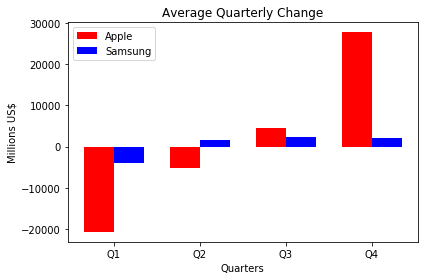

In [18]:
x1 = np.arange(len(quarters))  # the label locations
width = 0.35  # the width of the bars

fig_a, ax_a = plt.subplots()
rects1 = ax_a.bar(x1 - width/2, mean_changes_apple, width, label='Apple', color='red')
rects2 = ax_a.bar(x1 + width/2, mean_changes_ss, width, label='Samsung', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax_a.set_ylabel('Millions US$')
ax_a.set_xlabel('Quarters')
ax_a.set_title('Average Quarterly Change')
ax_a.set_xticks(x1)
ax_a.set_xticklabels(quarters)
ax_a.legend()
fig_a.tight_layout()
plt.show()

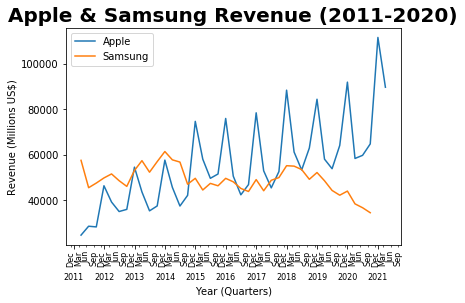

In [19]:
fig, ax = plt.subplots()
release = [38,34,30,26,22,18,14,10,6,2]
minor_release = [39,35,31,27,23,19,15,11,8,4]
count=1
count1=1

release_ss = [0,4,8,11,16,19,23,24,28,29,31,33,36,37]
release2 = [13,23,29,31,33,35,37]
count_a=1
count1_a = 1

ax.set_ylabel('Revenue (Millions US$)', fontsize = 10) 
ax.set_title('Apple & Samsung Revenue (2011-2020)',fontweight="bold", size=20)
ax.set_xlabel('Year (Quarters)', fontsize = 10)

plt.xticks(fontsize=8)

revenue_temp = revenue[2:]
dates_temp = dates[2:]

plt.plot(dates, revenue, label='Apple')

    
plt.plot(dates_temp, revenue_ss, label='Samsung')

plt.legend() 


years = mdates.YearLocator()
months = mdates.MonthLocator([3,6,9,12])
monthsFmt = mdates.DateFormatter('%b') 
yearsFmt = mdates.DateFormatter('\n\n%Y')
ax.xaxis.set_minor_locator(months)
ax.xaxis.set_minor_formatter(monthsFmt)
plt.setp(ax.xaxis.get_minorticklabels(), rotation=90, size = 8)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
